In [ ]:
import numpy as np
import pandas as pd

#Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
weather=pd.read_csv('/content/weatherAUS.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


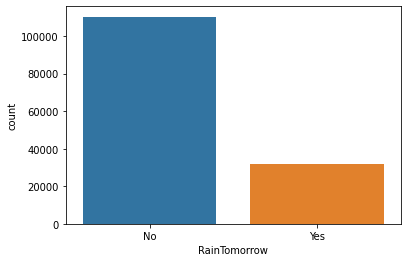

In [ ]:
sns.countplot(weather['RainTomorrow'])

In [ ]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Day'] = weather['Date'].dt.day
weather['Year'] = weather['Date'].dt.year

In [ ]:
weather.drop('Date',axis=1,inplace=True)

In [ ]:
numerical_columns=weather._get_numeric_data().columns
print('Numerical columns:', list(numerical_columns))
print('\n')

#CATEGORICAL COLUMNS
categorical_columns=list(set(weather)-set(numerical_columns))
print('Categorical colums: ',categorical_columns)

Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Day', 'Year']


Categorical colums:  ['Location', 'WindDir9am', 'RainTomorrow', 'WindDir3pm', 'WindGustDir', 'RainToday']


Text(0.5, 1.0, 'Correlation heatmap')

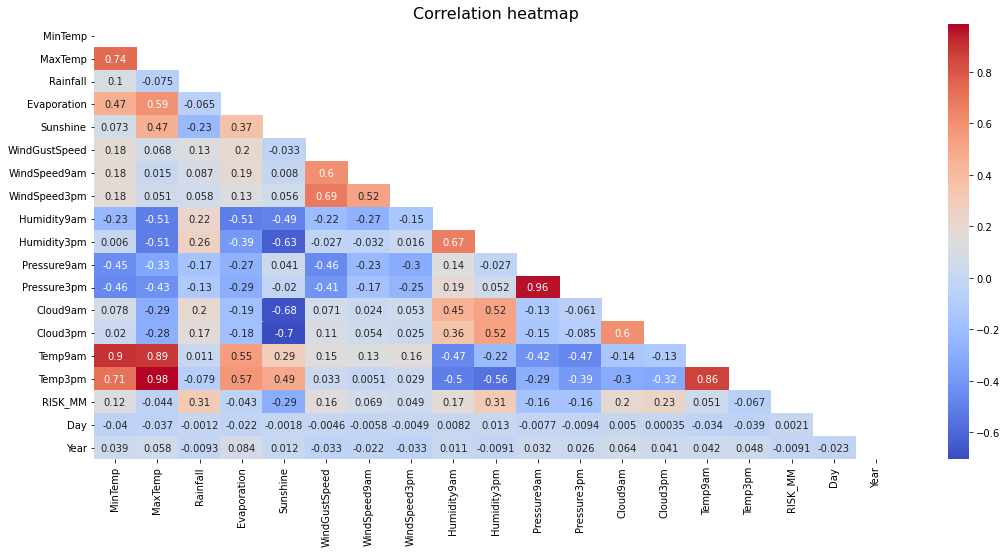

In [ ]:
plt.figure(figsize=(18,8))

#Define the mask to set the values in the upper triangle to True
mask_1=np.triu(np.ones_like(weather.corr(),dtype=np.bool))   
heatmap=sns.heatmap(weather.corr(),annot=True,cmap='coolwarm',mask=mask_1)
heatmap.set_title('Correlation heatmap',fontdict={'fontsize':16})

The mean max. temp. is:  23.226784191272355
The mean min. temp. is:  12.186399728729265
The mean sunshine over the years is:  7.624853113193594
The mean evaporation over the years is:  5.469824216349109


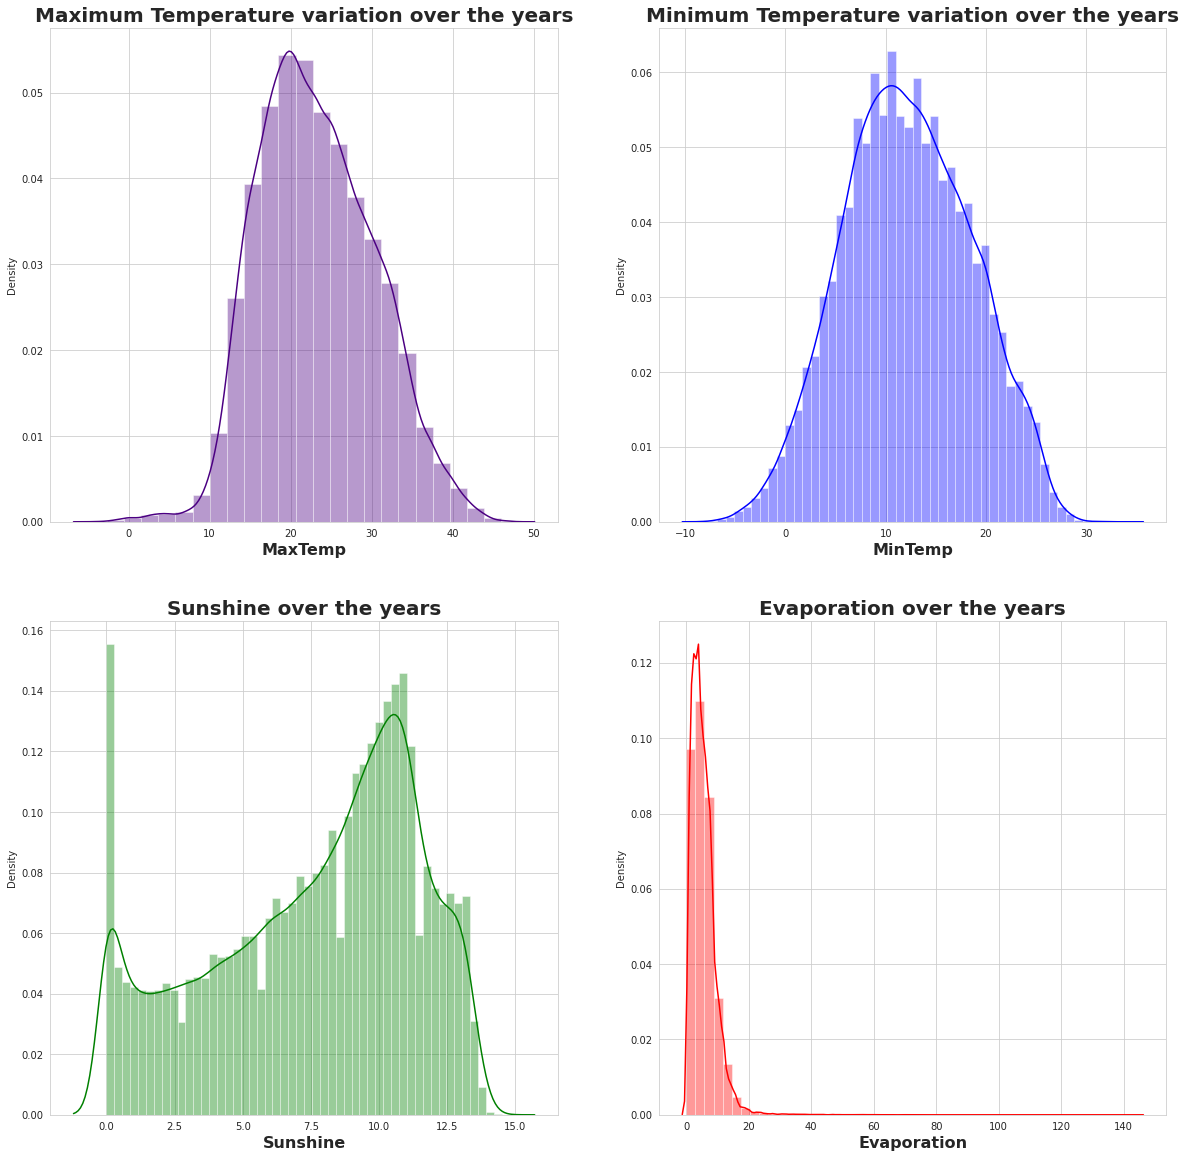

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.set_style('whitegrid')

#Maximum Temperature
plt.subplot(2,2,1)
plt.title('Maximum Temperature variation over the years',fontweight='bold',fontsize=20)
plt.xlabel('MaxTemp',fontweight='bold',fontsize=16)
sns.distplot(weather['MaxTemp'],color='indigo',bins=25)

#Minimum Temperature
plt.subplot(2,2,2)
plt.title('Minimum Temperature variation over the years',fontweight='bold',fontsize=20)
plt.xlabel('MinTemp',fontweight='bold',fontsize=16)
sns.distplot(weather['MinTemp'],color='blue')

#Sunshine
plt.subplot(2,2,3)
sns.distplot(weather['Sunshine'],bins=50,color='green')
plt.title('Sunshine over the years',fontweight='bold',fontsize=20)
plt.xlabel('Sunshine',fontweight='bold',fontsize=16)

#Evaporation
plt.subplot(2,2,4)
sns.distplot(weather['Evaporation'],bins=50,color='red')
plt.title('Evaporation over the years',fontweight='bold',fontsize=20)
plt.xlabel('Evaporation',fontweight='bold',fontsize=16)


print('\033[1m'+'The mean max. temp. is: ', weather['MaxTemp'].mean())
print('\033[1m'+'The mean min. temp. is: ', weather['MinTemp'].mean())
print('\033[1m'+'The mean sunshine over the years is: ', weather['Sunshine'].mean())
print('\033[1m'+'The mean evaporation over the years is: ', weather['Evaporation'].mean())

In [ ]:
weather['MinTemp'].fillna(weather['MinTemp'].mean(),inplace=True)
weather['MaxTemp'].fillna(weather['MaxTemp'].mean(),inplace=True)
weather['Evaporation'].fillna(weather['Evaporation'].mean(),inplace=True)
weather['Sunshine'].fillna(weather['Sunshine'].mean(),inplace=True)

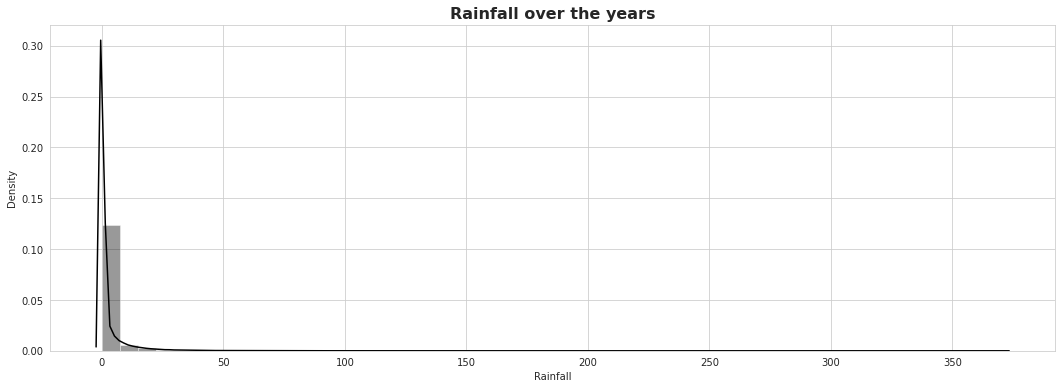

The mean rainfall over the years is:  2.349974074310838


In [ ]:
plt.figure(figsize=(18,6))
sns.distplot(weather['Rainfall'],bins=50,color='black')
plt.title('Rainfall over the years',fontweight='bold',fontsize=16)
plt.show()


print('\033[1m'+'The mean rainfall over the years is: ', weather['Rainfall'].mean())

In [ ]:
weather['Rainfall'].fillna(weather['Rainfall'].mean(),inplace=True)

In [ ]:
weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].mean(),inplace=True)
weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].mean(),inplace=True)
weather['Humidity9am'].fillna(weather['Humidity9am'].mean(),inplace=True)
weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean(),inplace=True)
weather['Pressure9am'].fillna(weather['Pressure9am'].mean(),inplace=True)
weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean(),inplace=True)
weather['Cloud9am'].fillna(weather['Cloud9am'].mean(),inplace=True)
weather['Cloud3pm'].fillna(weather['Cloud3pm'].mean(),inplace=True)
weather['Temp9am'].fillna(weather['Temp9am'].mean(),inplace=True)
weather['Temp3pm'].fillna(weather['Temp3pm'].mean(),inplace=True)
weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean(),inplace=True)

In [ ]:
weather['WindGustDir'].fillna('W',inplace=True)
weather['WindDir9am'].fillna('N',inplace=True)
weather['WindDir3pm'].fillna('SE',inplace=True)

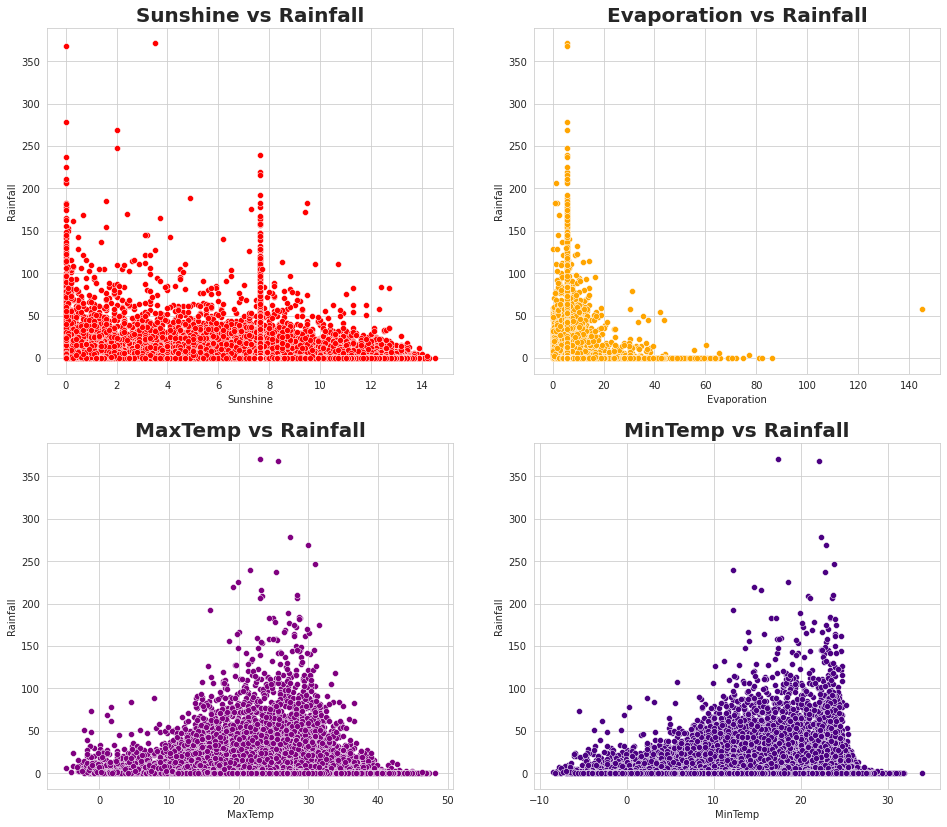

In [ ]:
plt.subplots(2,2,figsize=(16,14))

#Sunshine vs rainfall
plt.subplot(2,2,1)
sns.scatterplot(data=weather,x='Sunshine',y='Rainfall',color='red')
plt.title('Sunshine vs Rainfall',fontweight='bold',fontsize=20)

#Evaporation vs rainfall
plt.subplot(2,2,2)
sns.scatterplot(data=weather,x='Evaporation',y='Rainfall',color='orange')
plt.title('Evaporation vs Rainfall',fontweight='bold',fontsize=20)

#MaxTemp vs rainfall
plt.subplot(2,2,3)
sns.scatterplot(data=weather,x='MaxTemp',y='Rainfall',color='purple')
plt.title('MaxTemp vs Rainfall',fontweight='bold',fontsize=20)

#MinTemp vs rainfall
plt.subplot(2,2,4)
sns.scatterplot(data=weather,x='MinTemp',y='Rainfall',color='indigo')
plt.title('MinTemp vs Rainfall',fontweight='bold',fontsize=20)
plt.show()

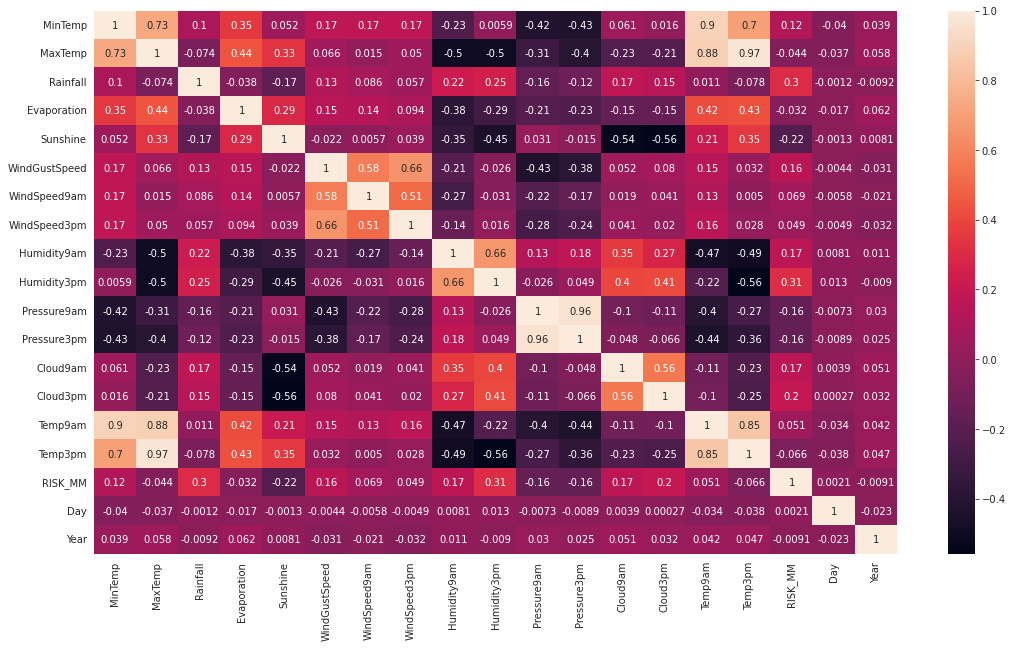

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(weather[numerical_columns].corr(),annot=True)

In [ ]:
for i in weather:
    if weather[i].dtype=='float64':
        q1 = weather[i].quantile(0.25)
        q3 = weather[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(weather[i])
        for j in weather[i]:
            if j > Upper_tail or j < Lower_tail:
                weather[i] = weather[i].replace(j, med)
    else:
        continue

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
categorical_columns=['RainTomorrow', 'WindDir3pm', 'WindGustDir', 'WindDir9am', 'RainToday', 'Location']
for i in categorical_columns:
    weather[i]=label_encoder.fit_transform(weather[i])

In [ ]:
X=weather.drop('RainTomorrow',axis=1)
y=weather['RainTomorrow']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.head(2)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (99535, 24)
Shape of X_test: (42658, 24)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [ ]:
X_train.shape

(99535, 24)

In [ ]:
weather = weather.reset_index()
weather.replace([np.inf, -np.inf], np.nan, inplace=True)
weather.fillna(weather.mean, inplace=True)

In [ ]:
lr.fit(X_train,y_train)
predict=lr.predict(X_test)

In [ ]:
predict

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     35784
           1       0.50      0.69      0.58      6874

    accuracy                           0.84     42658
   macro avg       0.72      0.78      0.74     42658
weighted avg       0.87      0.84      0.85     42658



In [ ]:
print(confusion_matrix(predict,y_test))

[[31036  4748]
 [ 2097  4777]]


In [ ]:
lr.score(X_test,y_test)

0.8395377185990904

Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction=dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     32995
           1       0.69      0.68      0.68      9663

    accuracy                           0.86     42658
   macro avg       0.80      0.79      0.79     42658
weighted avg       0.86      0.86      0.86     42658



In [ ]:
print(confusion_matrix(prediction,y_test))

[[30006  2989]
 [ 3127  6536]]


In [ ]:
dtree.score(X_test,y_test)

0.8566271273852502

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
RandomForestRegressorScore = rf.score(X_test,y_test)

In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     32995
           1       0.69      0.68      0.68      9663

    accuracy                           0.86     42658
   macro avg       0.80      0.79      0.79     42658
weighted avg       0.86      0.86      0.86     42658



In [ ]:
print(confusion_matrix(prediction,y_test))

[[30006  2989]
 [ 3127  6536]]


In [ ]:
rf.score(X_test,y_test)

0.9055042430493694

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
xgb_model=XGBClassifier()

In [ ]:
xgb_model.fit(X_train,y_train)

XGBClassifier()

In [ ]:
predictions_xgb=xgb_model.predict(X_test)

In [ ]:
predictions_xgb

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
xgb_model.score(X_test,y_test)

0.8974869895447513

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)

In [ ]:
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
classification_report(predictions,y_test)
print('\n')
confusion_matrix(predictions,y_test)

array([[31815,  5893],
       [ 1318,  3632]])

In [ ]:
knn.score(X_test,y_test)

0.8309578508134465